In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap
    !pip install scikit-learn==0.24.1

# If you're working locally:
else:
    DATA_PATH = '../data/'

Chosen an appropriate dataset (see below). CHECK



Chosen the target from your dataset that your model will predict. CHECK

Specified whether that target requires a regression or a classification model. CHECK

Chosen appropriate performance metrics to evaluate your model. Check

Split your dataset into training, test, and (if applicable) validation sets. CHECK

Established a baseline performance score for your dataset. CHECK

Built and trained a linear model for your dataset. CHECK

Built and trained a tree-based model for your dataset. CHECK

Evaluated your models’ performance on the test set in comparison to your baseline. CHECK

Commited your commented code to a GitHub repo.

Published a blog post reporting on your project that
is 300 words long,
explains how you chose your dataset and what steps you took to wrangle it,
explains which performance metrics you chose and why,
details how your models performed on the test set,
contains two visualizations learned in Unit 2, accompanied by explanations of what those visualizations show about your model(s).

In order to meet the stretch criteria for Build Week, your project must demonstrate that you have done two of the following:

Used hyperparameter tuning to improve the performance of your linear model.

Used hyperparameter tuning to improve the performance of your tree-based model.
Deployed an interactive web app that uses one of your models. 

In [ ]:
   from google.colab import files
   uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

In [ ]:

df = pd.read_csv('all_seasons.csv')

In [ ]:
def wrangle(df):
  df.drop(columns=['draft_round', 'age', 'player_name','draft_year','college','season','country','team_abbreviation'],inplace=True)
  df = df[df.columns[1:]]
  df["draft_number"] = [61 if x == "Undrafted" else int(x) for x in df["draft_number"]]
  df['draft_number'] = df['draft_number'].astype(int)
  df = df.loc[df['gp'] >= 15]
  df = df.loc[df['draft_number'] <= 61]
  df['draft_number'] = df['draft_number'].map({1: 'Star_Potential', 2: 'Star_Potential', 
                                                  3: 'Star_Potential', 4: 'Star_Potential', 
                                                  5: 'Star_Potential', 
                                                  6: 'Star_Potential', 7: 'Star_Potential', 
                                                  8: 'Star_Potential', 9: 'Star_Potential', 
                                                  10 : 'Star_Potential', 11: 'Starter_Potential',
                                                  12: 'Starter_Potential', 
                                                  13: 'Starter_Potential', 14: 'Starter_Potential', 
                                                  15: 'Starter_Potential', 
                                                  16: 'Starter_Potential', 17: 'Starter_Potential', 
                                                  18: 'Starter_Potential', 19: 'Starter_Potential', 
                                                  20 : 'Starter_Potential', 21: 'Starter_Potential',
                                                  22: 'Starter_Potential', 
                                                  23: 'Starter_Potential', 24: 'Starter_Potential', 
                                                  25: 'Starter_Potential', 
                                                  26: 'Starter_Potential', 27: 'Starter_Potential', 
                                                  28: 'Starter_Potential', 29: 'Starter_Potential', 
                                                  30 : 'Starter_Potential', 31: 'Flyer',
                                                  32: 'Flyer', 
                                                  33: 'Flyer', 34: 'Flyer', 
                                                  35: 'Flyer', 
                                                  36: 'Flyer', 37: 'Flyer', 
                                                  38: 'Flyer', 39: 'Flyer', 
                                                  40 : 'Flyer', 41: 'Flyer', 42: 'Flyer', 
                                                  43: 'Flyer', 44: 'Flyer', 
                                                  45: 'Flyer', 
                                                  46: 'Flyer', 47: 'Flyer', 
                                                  48: 'Flyer', 49: 'Flyer', 
                                                  50 : 'Flyer', 51: 'Flyer',
                                                  52: 'Flyer', 
                                                  53: 'Flyer', 54: 'Flyer', 
                                                  55: 'Flyer', 
                                                  56: 'Flyer', 57: 'Flyer', 
                                                  58: 'Flyer', 59: 'Flyer', 
                                                  60 : 'Flyer', 61: 'Flyer'
                                                  }) 

  return df




In [ ]:
df = wrangle(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df.head()

,player_height,player_weight,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,198.12,99.790240,Starter_Potential,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,215.90,117.933920,Starter_Potential,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
3,203.20,100.697424,Star_Potential,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,205.74,108.862080,Star_Potential,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040
5,200.66,97.522280,Starter_Potential,52,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102


In [ ]:
y = df['draft_number']
X = df.drop(columns=['draft_number'])

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

In [ ]:
baseline_acc = y_train.value_counts(normalize=True).max()

print(baseline_acc)

0.3633687444003584


In [ ]:
model = make_pipeline( 
    SimpleImputer(strategy='most_frequent'),
    ce.OrdinalEncoder(),  
    RandomForestClassifier(random_state=42)
)
model.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
training_acc = model.score(X_train,y_train)
val_acc = model.score(X_val,y_val)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 1.0
Validation Accuracy Score: 0.6008188331627431


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import category_encoders as ce 

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegressionCV()
)



# YOUR CODE HERE
model_lr.fit(X_train, y_train);


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
training_acc = model_lr.score(X_train,y_train)
val_acc = model_lr.score(X_val,y_val)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.5158069883527454
Validation Accuracy Score: 0.5281473899692938


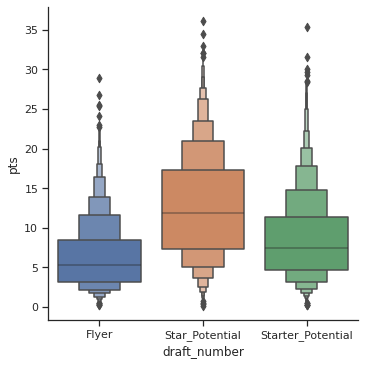

In [ ]:
#intuitively important stat #1
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="pts", kind="boxen",
            data=df.sort_values("draft_number"))

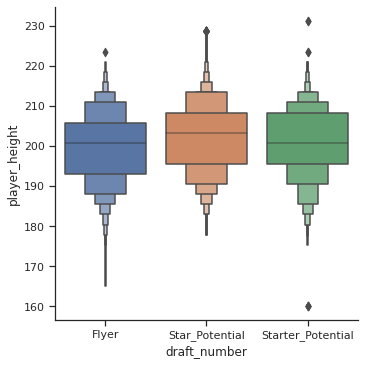

In [ ]:
#intuitively important stat #2
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="player_height", kind="boxen",
            data=df.sort_values("draft_number"))

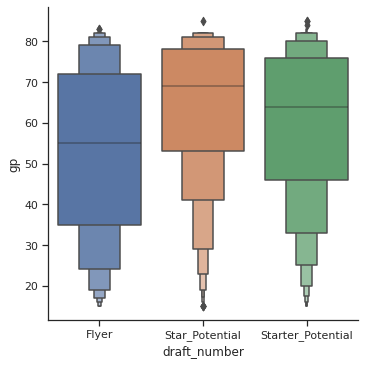

In [ ]:
#intuitively important stat #3
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="gp", kind="boxen",
            data=df.sort_values("draft_number"))

In [ ]:
#FEATURE IMPORTANCE TIME

In [ ]:
dir(model_lr.named_steps)


['logisticregressioncv', 'onehotencoder', 'standardscaler']

In [ ]:
lr = model_lr.named_steps['logisticregressioncv']
ohe = model_lr.named_steps['onehotencoder']
ss = model_lr.named_steps['standardscaler']

lr.coef_


array([[-0.32412852,  0.0019842 , -0.08797412, -0.26425691, -0.19182628,
        -0.2115746 , -0.03254165,  0.09728398, -0.01482909, -0.16299461,
         0.12033797,  0.03207248],
       [ 0.2518042 ,  0.05951445,  0.02492698,  0.34799274,  0.19534946,
         0.21794571,  0.02302796, -0.1000148 ,  0.05119592,  0.11424515,
        -0.13926463, -0.03735097],
       [ 0.07232432, -0.06149866,  0.06304713, -0.08373584, -0.00352318,
        -0.00637111,  0.00951369,  0.00273082, -0.03636683,  0.04874946,
         0.01892666,  0.00527849]])

In [ ]:
#encoder = model_lr.named_steps['onehotencoder']
#X_train_encoded = encoder.fit_transform(X_train)
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
ss = model_lr.named_steps['standardscaler']
X_train_scaled = ss.fit_transform(X_train_encoded)


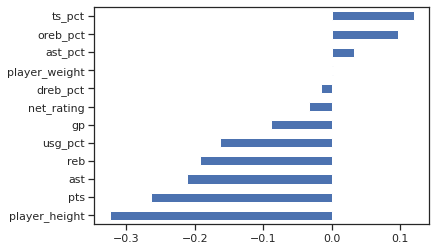

In [ ]:
%matplotlib inline
coefficients = pd.Series(lr.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh(); #bar charts

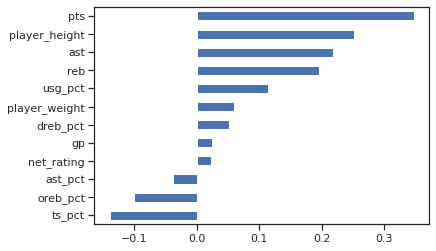

In [ ]:
%matplotlib inline
coefficients = pd.Series(lr.coef_[1], X_train_encoded.columns)
coefficients.sort_values().plot.barh(); #bar charts

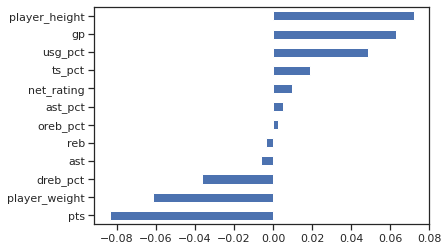

In [ ]:
%matplotlib inline
coefficients = pd.Series(lr.coef_[2], X_train_encoded.columns)
coefficients.sort_values().plot.barh(); #bar charts

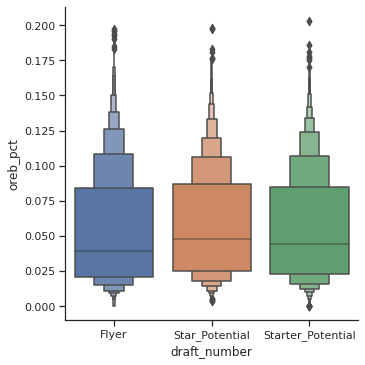

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="oreb_pct", kind="boxen",
            data=df.sort_values("draft_number"))

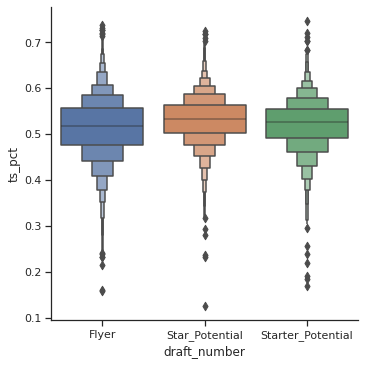

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="ts_pct", kind="boxen",
            data=df.sort_values("draft_number"))

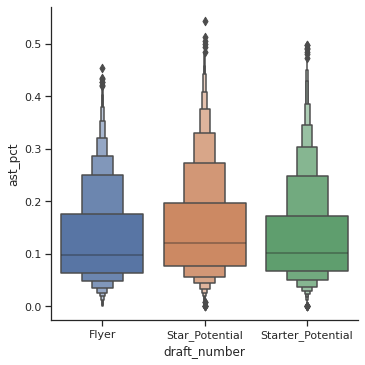

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="ast_pct", kind="boxen",
            data=df.sort_values("draft_number"))

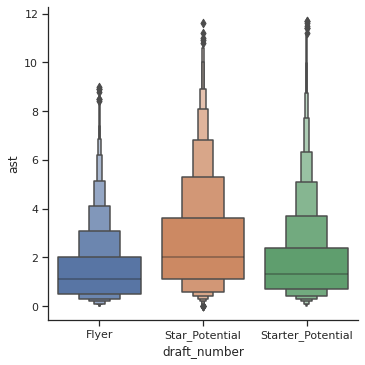

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="ast", kind="boxen",
            data=df.sort_values("draft_number"))

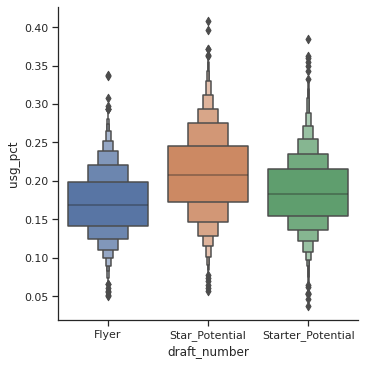

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="draft_number", y="usg_pct", kind="boxen",
            data=df.sort_values("draft_number"))

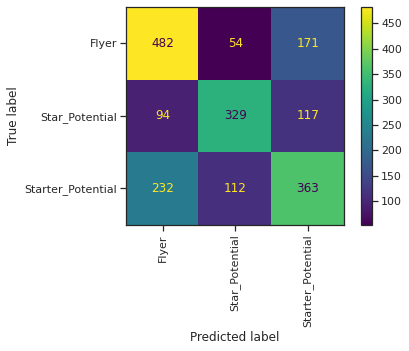

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_val, y_val, values_format='.0f', xticks_rotation='vertical')